In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Bootstrap review: San Francisco City Salaries

In [2]:
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
pop_median = percentile(50, sf_pop.column('Total Compensation'))
print("Population median is $", pop_median)

our_sample = sf_pop.sample(300, with_replacement = False)

Population median is $ 112965.15


In [4]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

med_bins = np.arange(90000, 125001, 2500)

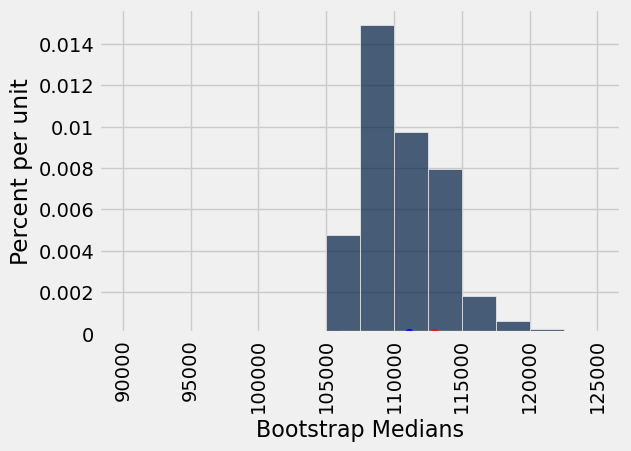

In [5]:
## Let's do the whole process, all at once: 
## 1. take a sample, 

our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(201):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

## Bootstrap Review: Mean Maternal Age

In [6]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


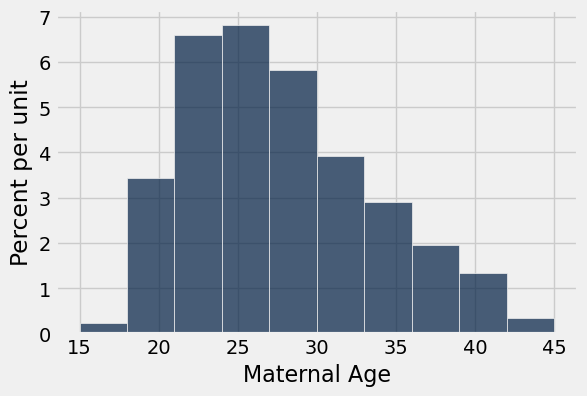

In [7]:
births.hist('Maternal Age')

In [8]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [8]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [9]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

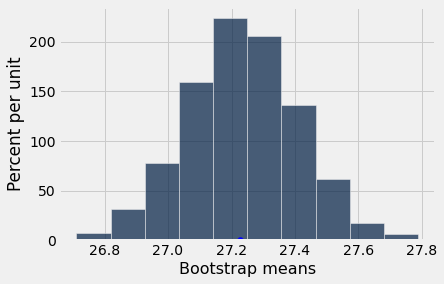

In [10]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [11]:
values = make_array(2, 3, 3, 9)

In [12]:
sum(values)/len(values)

4.25

In [13]:
np.average(values)

4.25

In [14]:
np.mean(values)

4.25

In [15]:
(2 + 3 + 3 + 9)/4

4.25

In [16]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [17]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


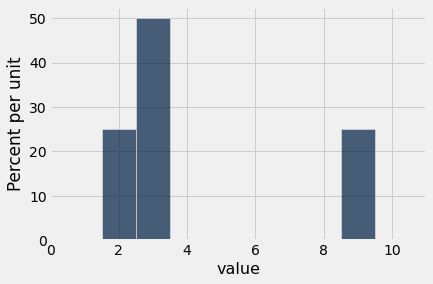

In [18]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [19]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [20]:
#or 
new_vals2 = np.append(2*np.ones(10), 3*np.ones(20))
new_vals2 = np.append(new_vals2, 9*np.ones(10))
new_vals2 = make_array(new_vals2)
new_vals2

array([[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0,
        3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,
        3.0, 3.0, 3.0, 3.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,
        9.0]], dtype=object)

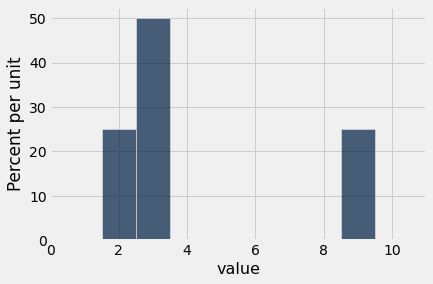

In [21]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [22]:
np.average(values)

4.25

In [23]:
np.average(new_vals)

4.25

### Discussion Question

In [24]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


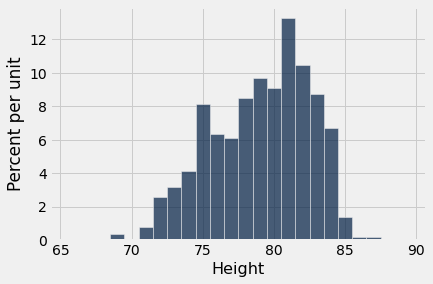

In [25]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [26]:
heights = nba.column('Height')
percentile(50, heights)

80

In [27]:
np.average(heights)

79.065346534653472

## Standard Deviation ##

In [28]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [29]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [30]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [31]:
sum(deviations)

0.0

In [32]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [33]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [34]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [35]:
np.std(values)

2.7726341266023544